# USAD

## Environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn

torch.cuda.empty_cache()


import math
import time
from datetime import datetime
import pytz
import os
import json
import sklearn

from utils import *
from usad import *



import wandb #For logging results in weights and bias
# wandb.login() 
# os.environ["WANDB_MODE"] = "offline"

# wandb.init(project="capstone-usad")



/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# !nvidia-smi -L

device = get_default_device()

## EDA - Data Pre-Processing

### Select dataset

In [3]:
# Dataset to be used
dataset='Swat(us)'

if dataset=='Swat': #Full swat dataset
    traindata='/dataset/swat/SWaT_Dataset_Normal_v1.csv'
    testdata='/dataset/swat/SWaT_Dataset_Attack_v0.csv'
    time_col= " Timestamp"
    label_col="Normal/Attack"

if dataset=='Swat(us)': # Swat dataset undersampled by 10 times
    traindata='/dataset/swat(mini)/train.csv'
    testdata='/dataset/swat(mini)/test.csv'
    time_col= "Unnamed: 0"
    label_col="attack"
    
    
elif dataset =='CC_minmax_adasyn':
    traindata='/dataset/creditcard/minmax/adasyn/train.csv'
    testdata='/dataset/creditcard/minmax/adasyn/test.csv'
    time_col= "Time"
    label_col="attack"    
    
elif dataset =='CC_minmax_all':
    traindata='/dataset/creditcard/minmax/all/train.csv'
    testdata='/dataset/creditcard/minmax/all/test.csv'
    time_col= "Time"
    label_col="attack"
    
elif dataset =='CC_minmax_anomaly':
    traindata='/dataset/creditcard/minmax/anomaly/train.csv'
    testdata='/dataset/creditcard/minmax/anomaly/test.csv'
    time_col= "Time"
    label_col="attack"  
    
    
elif dataset =='CC_minmax_first':
    traindata='/dataset/creditcard/minmax/first/train.csv'
    testdata='/dataset/creditcard/minmax/first/test.csv'
    time_col= "Time"
    label_col="attack"

elif dataset =='CC_minmax_last':
    traindata='/dataset/creditcard/minmax/last/train.csv'
    testdata='/dataset/creditcard/minmax/last/test.csv'
    time_col= "Time"
    label_col="attack"

elif dataset =='CC_minmax_mean':
    traindata='/dataset/creditcard/minmax/mean/train.csv'
    testdata='/dataset/creditcard/minmax/mean/test.csv'
    time_col= "Time"
    label_col="attack"
    
elif dataset =='CC_minmax_median':
    traindata='/dataset/creditcard/minmax/median/train.csv'
    testdata='/dataset/creditcard/minmax/median/test.csv'
    time_col= "Time"
    label_col="attack"

elif dataset =='CC_minmax_pca':
    traindata='/dataset/creditcard/minmax/pca/train.csv'
    testdata='/dataset/creditcard/minmax/pca/test.csv'
    time_col= "Time"
    label_col="attack"
    
elif dataset =='CC_ss_adasyn':
    traindata='/dataset/creditcard/standardscale/adasyn_s/train.csv'
    testdata='/dataset/creditcard/standardscale/adasyn_s/test.csv'
    time_col= "Time"
    label_col="attack"      
    
elif dataset =='CC_ss_all':
    traindata='/dataset/creditcard/standardscale/all/train.csv'
    testdata='/dataset/creditcard/standardscale/all/test.csv'
    time_col= "Time"
    label_col="attack"
    
elif dataset =='CC_ss_anomaly':
    traindata='/dataset/creditcard/standardscale/anomaly/train.csv'
    testdata='/dataset/creditcard/standardscale/anomaly/test.csv'
    time_col= "Time"
    label_col="attack"  
    
    
elif dataset =='CC_ss_first':
    traindata='/dataset/creditcard/standardscale/first/train.csv'
    testdata='/dataset/creditcard/standardscale/first/test.csv'
    time_col= "Time"
    label_col="attack"

elif dataset =='CC_ss_last':
    traindata='/dataset/creditcard/standardscale/last/train.csv'
    testdata='/dataset/creditcard/standardscale/last/test.csv'
    time_col= "Time"
    label_col="attack"

elif dataset =='CC_ss_mean':
    traindata='/dataset/creditcard/standardscale/mean/train.csv'
    testdata='/dataset/creditcard/standardscale/mean/test.csv'
    time_col= "Time"
    label_col="attack"
    
elif dataset =='CC_ss_median':
    traindata='/dataset/creditcard/standardscale/median/train.csv'
    testdata='/dataset/creditcard/standardscale/median/test.csv'
    time_col= "Time"
    label_col="attack"

elif dataset =='CC_ss_pca':
    traindata='/dataset/creditcard/standardscale/pca/train.csv'
    testdata='/dataset/creditcard/standardscale/pca/test.csv'
    time_col= "Time"
    label_col="attack"    
    
elif dataset =='MSL_m':
    traindata='/dataset/MSL/msl_m/train.csv'
    testdata='/dataset/MSL/msl_m/test.csv'
    time_col= "timestamp"
    label_col="attack"

elif dataset =='MSL_tel':
    traindata='/dataset/MSL/msl_tel/train.csv'
    testdata='/dataset/MSL/msl_tel/test.csv'
    time_col= "timestamp"
    label_col="attack"
    
elif dataset =='MSL_tel_m':
    traindata='/dataset/MSL/msl_tel_m/train.csv'
    testdata='/dataset/MSL/msl_tel_m/test.csv'
    time_col= "timestamp"
    label_col="attack"    
    
elif dataset =='SMAP_m':
    traindata='/dataset/SMAP/smap_m/train.csv'
    testdata='/dataset/SMAP/smap_m/test.csv'
    time_col= "timestamp"
    label_col="attack"

elif dataset =='SMAP_tel':
    traindata='/dataset/SMAP/smap_tel/train.csv'
    testdata='/dataset/SMAP/smap_tel/test.csv'
    time_col= "timestamp"
    label_col="attack"
    
elif dataset =='SMAP_tel_m':
    traindata='/dataset/SMAP/smap_tel/train.csv'
    testdata='/dataset/SMAP/smap_tel/test.csv'
    time_col= "timestamp"
    label_col="attack"

### Normal period

In [4]:
# Load the train data
normal = pd.read_csv(traindata)

normal.shape

(47520, 53)

In [5]:
normal.head()

,Unnamed: 0,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,attack
0,2160,0.935538,0.433560,1.0,1.0,0.0,0.604545,0.186672,0.548938,0.988694,...,1.0,0.0,0.958091,0.283843,0.961230,0.000037,0.0,0.0,0.0,0
1,2161,0.894236,0.434363,1.0,1.0,0.0,0.604545,0.186672,0.546774,0.989363,...,1.0,0.0,0.958216,0.283843,0.961189,0.000037,0.0,0.0,0.0,0
2,2162,0.952981,0.433002,1.0,1.0,0.0,0.604545,0.186672,0.544756,0.989234,...,1.0,0.0,0.959343,0.296943,0.963501,0.000037,0.0,0.0,0.0,0
3,2163,0.912204,0.434542,1.0,1.0,0.0,0.604545,0.190285,0.543553,0.990162,...,1.0,0.0,0.959187,0.292577,0.962446,0.000037,0.0,0.0,0.0,0
4,2164,0.922004,0.433872,1.0,1.0,0.0,0.604545,0.190285,0.541775,0.989157,...,1.0,0.0,0.958592,0.288210,0.962163,0.000037,0.0,0.0,0.0,0


In [6]:
#Drop the anormalies from the train data
# Swat train data already do no contain abnormal data
if dataset!='Swat':
    normal= normal.loc[normal[label_col] == 0] 


In [7]:
normal[label_col].value_counts()

0    47520
Name: attack, dtype: int64

In [8]:
#Drop the time and label column from the train data

normal = normal.drop([time_col , label_col] , axis = 1)
# normal = normal.drop([label_col] , axis = 1)
normal.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
0,0.935538,0.433560,1.0,1.0,0.0,0.604545,0.186672,0.548938,0.988694,1.0,...,0.972722,1.0,0.0,0.958091,0.283843,0.961230,0.000037,0.0,0.0,0.0
1,0.894236,0.434363,1.0,1.0,0.0,0.604545,0.186672,0.546774,0.989363,1.0,...,0.972722,1.0,0.0,0.958216,0.283843,0.961189,0.000037,0.0,0.0,0.0
2,0.952981,0.433002,1.0,1.0,0.0,0.604545,0.186672,0.544756,0.989234,1.0,...,0.973227,1.0,0.0,0.959343,0.296943,0.963501,0.000037,0.0,0.0,0.0
3,0.912204,0.434542,1.0,1.0,0.0,0.604545,0.190285,0.543553,0.990162,1.0,...,0.972116,1.0,0.0,0.959187,0.292577,0.962446,0.000037,0.0,0.0,0.0
4,0.922004,0.433872,1.0,1.0,0.0,0.604545,0.190285,0.541775,0.989157,1.0,...,0.972116,1.0,0.0,0.958592,0.288210,0.962163,0.000037,0.0,0.0,0.0


In [9]:
# Transform all columns into float64
for i in list(normal): 
    normal[i]=normal[i].apply(lambda x: str(x).replace("," , "."))
normal = normal.astype(float)

#### Normalization for datasets which have not done scaling

In [10]:
from sklearn import preprocessing
min_max_scaler = preprocessing.StandardScaler()

if dataset=='Swat':
    x = normal.values
    x_scaled = min_max_scaler.fit_transform(x)
    normal = pd.DataFrame(x_scaled)

### Attack

In [11]:
#Read data
# attack = pd.read_csv("input/SWaT_Dataset_Attack_v0.csv",sep=",")#, nrows=1000)
attack = pd.read_csv(testdata,sep=",")#, nrows=1000)

# Create test labels

if dataset=='Swat':
    # For swat dataset
    labels = [ float(label!= 'Normal' ) for label  in attack[label_col].values]

#For others credit card, SMAP, MSL,
else:
    labels = [ float(label!= 0 ) for label  in attack[label_col].values]



In [12]:
#Drop the time and label column from the train data

attack = attack.drop([time_col , label_col] , axis = 1)
# attack = attack.drop([label_col] , axis = 1)



In [13]:
#Calculate test data anomaly percentage
anormaly_percentage=labels.count(1)/attack.shape[0]*100
anormaly_percentage

12.20910848836434

In [14]:
# Transform all columns into float64
for i in list(attack):
    attack[i]=attack[i].apply(lambda x: str(x).replace("," , "."))
attack = attack.astype(float)

#### Normalization for test data which has not done scaling

In [15]:
from sklearn import preprocessing

if dataset=='Swat':
    x = attack.values 
    x_scaled = min_max_scaler.transform(x)
    attack = pd.DataFrame(x_scaled)

### Windows

In [16]:
window_size=1     #5 ,10 ,30,60

In [17]:
windows_normal=normal.values[np.arange(window_size)[None, :] + np.arange(normal.shape[0]-window_size)[:, None]]
windows_normal.shape

(47519, 1, 51)

In [18]:
windows_attack=attack.values[np.arange(window_size)[None, :] + np.arange(attack.shape[0]-window_size)[:, None]]
windows_attack.shape

(44990, 1, 51)

## Training

In [19]:
import torch.utils.data as data_utils

BATCH_SIZE =  1000 #1000
N_EPOCHS = 100
hidden_size = 5 # 10,30,50 

w_size=windows_normal.shape[1]*windows_normal.shape[2]
z_size= windows_normal.shape[1]*hidden_size

windows_normal_train = windows_normal[:int(np.floor(.8 *  windows_normal.shape[0]))]
windows_normal_val = windows_normal[int(np.floor(.8 *  windows_normal.shape[0])):int(np.floor(windows_normal.shape[0]))]

train_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_normal_train).float().view(([windows_normal_train.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

val_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_normal_val).float().view(([windows_normal_val.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

test_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_attack).float().view(([windows_attack.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

model = UsadModel(w_size, z_size)
model = to_device(model,device)

In [20]:
w_size, z_size

(51, 5)

In [21]:
history = training(N_EPOCHS,model,train_loader,val_loader)

Epoch [0], val_loss1: 0.1530, val_loss2: 0.1455
Epoch [1], val_loss1: 0.0399, val_loss2: -0.0009
Epoch [2], val_loss1: 0.0306, val_loss2: -0.0110
Epoch [3], val_loss1: 0.0302, val_loss2: -0.0158
Epoch [4], val_loss1: 0.0299, val_loss2: -0.0186
Epoch [5], val_loss1: 0.0297, val_loss2: -0.0204
Epoch [6], val_loss1: 0.0297, val_loss2: -0.0217
Epoch [7], val_loss1: 0.0297, val_loss2: -0.0227
Epoch [8], val_loss1: 0.0297, val_loss2: -0.0235
Epoch [9], val_loss1: 0.0297, val_loss2: -0.0242
Epoch [10], val_loss1: 0.0297, val_loss2: -0.0247
Epoch [11], val_loss1: 0.0303, val_loss2: -0.0257
Epoch [12], val_loss1: 0.0300, val_loss2: -0.0257
Epoch [13], val_loss1: 0.0298, val_loss2: -0.0259
Epoch [14], val_loss1: 0.0299, val_loss2: -0.0262
Epoch [15], val_loss1: 0.0299, val_loss2: -0.0264
Epoch [16], val_loss1: 0.0299, val_loss2: -0.0267
Epoch [17], val_loss1: 0.0299, val_loss2: -0.0268
Epoch [18], val_loss1: 0.0299, val_loss2: -0.0270
Epoch [19], val_loss1: 0.0299, val_loss2: -0.0272
Epoch [20],

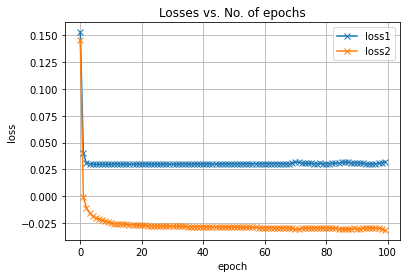

In [22]:
plot_history(history)

In [23]:
torch.save({
            'encoder': model.encoder.state_dict(),
            'decoder1': model.decoder1.state_dict(),
            'decoder2': model.decoder2.state_dict()
            }, "model.pth")

In [24]:
# model

## Testing

In [25]:
checkpoint = torch.load("model.pth")

model.encoder.load_state_dict(checkpoint['encoder'])
model.decoder1.load_state_dict(checkpoint['decoder1'])
model.decoder2.load_state_dict(checkpoint['decoder2'])

<All keys matched successfully>

In [26]:
#                       alpha, beta 

with torch.no_grad(): results=testing(model,test_loader,0.5,0.5)

In [27]:
len(results)

45

In [28]:
windows_labels=[]
for i in range(len(labels)-window_size):
    windows_labels.append(list(np.int_(labels[i:i+window_size])))

In [29]:
y_test = [1.0 if (np.sum(window) > 0) else 0 for window in windows_labels ]

In [30]:
num_windows=len(y_test)
num_anormal_windows=y_test.count(1)
win_anormal_percentage=num_anormal_windows/num_windows*100

print('Number of windows :'+ str(len(y_test)))
print('Number of windows (abnormal) :'+ str(y_test.count(1)))
print('Number of windows (normal) :'+ str(y_test.count(0)))
print('Abnormal windows (%) :'+ str(round(win_anormal_percentage,3)))


Number of windows :44990
Number of windows (abnormal) :5493
Number of windows (normal) :39497
Abnormal windows (%) :12.209


In [31]:
y_pred=np.concatenate([torch.stack(results[:-1]).flatten().detach().cpu().numpy(),
                              results[-1].flatten().detach().cpu().numpy()])

In [32]:
len(y_test), len(y_pred)

(44990, 44990)

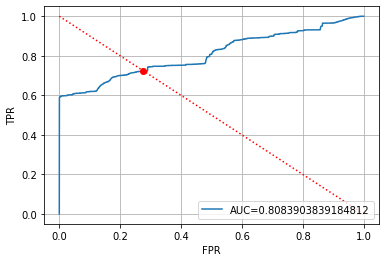

In [33]:
threshold=ROC(y_test,y_pred)



In [34]:
print('Threshold : ', threshold)

Threshold :  [0.21232551]


### Anomaly score threshold
####  Threshold adjustment to fine tune on the prediction of the anomalies

In [35]:
# threshold= [0.033]
threshold= [0.305] #Optimal threshold for swat(us)
# threshold= [10] #Threshold for Swat for good F1 

In [36]:
y_pred_ = np.zeros(y_pred.shape[0])
y_pred_[y_pred >= threshold] = 1

In [38]:
np.array(y_test)

array([0., 0., 0., ..., 0., 0., 0.])

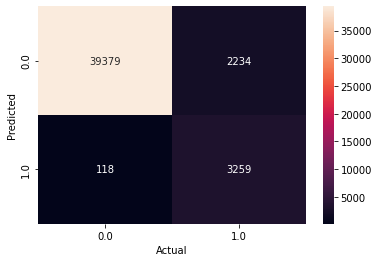

In [39]:
confusion_matrix(np.array(y_test), y_pred_)

In [40]:
print(sklearn.metrics.classification_report(y_test, y_pred_))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     39497
         1.0       0.97      0.59      0.73      5493

    accuracy                           0.95     44990
   macro avg       0.96      0.80      0.85     44990
weighted avg       0.95      0.95      0.94     44990



### Plot the test labels and predicted results

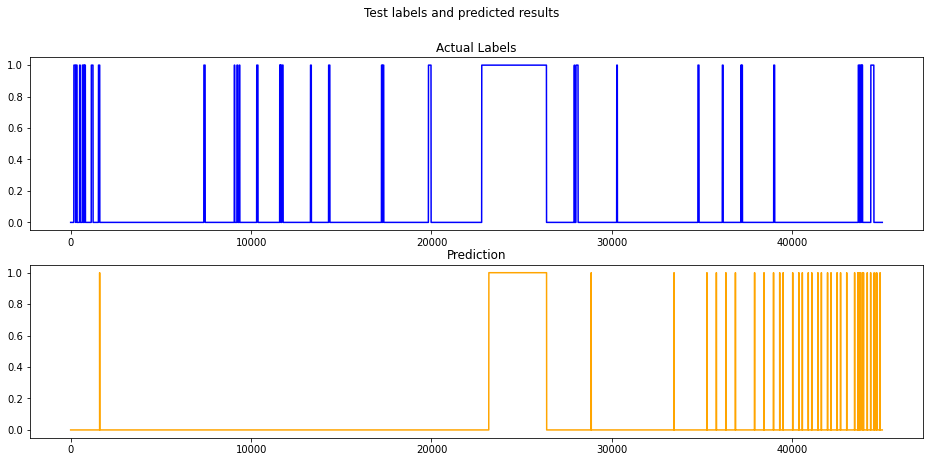

In [41]:
x=list(range(len(y_test)))

fig, (ax1, ax2) = plt.subplots(2, figsize=(16,7))

fig.suptitle('Test labels and predicted results')
ax1.plot(x, y_test, 'b')
ax2.plot(x, y_pred_, color='orange')
ax1.set_title('Actual Labels')
ax2.set_title('Prediction')

fig.savefig("fig1.png") 

### Plot the anomaly score

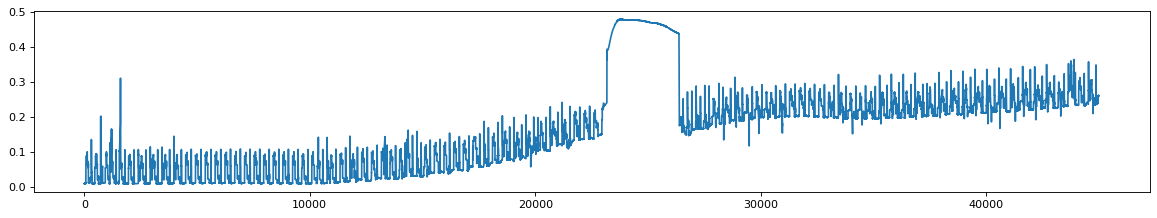

<Figure size 432x288 with 0 Axes>

In [43]:
plt.figure(figsize=(18, 3), dpi=80)
plt.plot(x, y_pred)
plt.show()
plt.savefig("2.png") 

In [42]:
report = sklearn.metrics.classification_report(y_test, y_pred_, output_dict=True)
precision =  report['1.0']['precision'] 
recall = report['1.0']['recall']    
f1 = report['1.0']['f1-score']

In [64]:
#Path to save the performance metric result


path=os.path.join(os.getcwd(),'result_final')

# file_path = os.sep.join([path, 'result_'+dataset+'.json'])
file_path = os.sep.join([path, 'result_'+'swat'+'.json'])






In [65]:
# y = {'datetime': datetime.now().strftime("%d-%b-%Y, %H:%M:%S"), 'F1_score': round(f1,2), 'Precision': round(precision,2), 'Recall': round(recall,2), 'Remarks': remarks }



y = {'datetime': datetime.now().strftime("%d-%b-%Y, %H:%M:%S"),
     'F1_score': round(f1,2),
     'Precision': round(precision,2),
     'Recall': round(recall,2),
     'Epoch': N_EPOCHS,
     'Batch Size': BATCH_SIZE ,
     'Win Size': window_size,
     'Hidden_size': hidden_size ,
     'Threshold': str(threshold[0]),
     'Win_anomaly(%)': str(round(win_anormal_percentage,3)),

    }

if os.path.isfile(file_path): #if an existing file exist in file_path 
    with open(file_path, 'r+') as f:
        file_data = json.load(f)
        
        if dataset in file_data.keys():
            file_data[dataset].append(y)
            f.seek(0)
        else:
            file_data[dataset] = [y]
            f.seek(0)
            
        json.dump(file_data, f, indent=10)
else:
    with open(file_path, 'w') as f:
        file_data = {dataset: [y]}
        json.dump(file_data, f, indent=10)    
          

In [66]:
# file_path = os.sep.join([os.getcwd(), 'result.json'])
file_path

'/workspace/result_final/result_swat.json'

In [67]:
with open(file_path, 'r') as f:
    data = json.load(f)

temp = []
for k in data.keys():
    df = pd.json_normalize(data[k])
    df.insert(1, 'Dataset', k)
    temp.append(df)

df1 = pd.concat(temp, axis=0).reset_index(drop=True)
df1

,datetime,Dataset,F1_score,Precision,Recall,Epoch,Batch Size,Win Size,Hidden_size,Threshold,Win_anomaly(%)
0,"06-Nov-2022, 21:51:47",Swat,0.74,0.89,0.64,60,1000,2,1,10,12.148
1,"06-Nov-2022, 22:06:06",Swat,0.74,0.89,0.64,60,1000,2,5,10,12.148
2,"06-Nov-2022, 22:17:27",Swat,0.75,0.91,0.64,60,1000,2,10,10,12.148
3,"06-Nov-2022, 22:29:09",Swat,0.74,0.89,0.64,60,1000,2,20,10,12.148
4,"06-Nov-2022, 07:39:50",Swat,0.75,0.90,0.63,100,1000,20,30,10,12.289
5,"06-Nov-2022, 08:00:28",Swat,0.75,0.90,0.63,100,1000,20,20,10,12.289
6,"06-Nov-2022, 08:19:16",Swat,0.75,0.91,0.63,100,1000,20,10,10,12.289
7,"06-Nov-2022, 11:18:28",Swat,0.74,0.90,0.63,100,1000,20,5,10,12.289
8,"04-Nov-2022, 03:26:01",Swat,0.74,0.90,0.63,60,1000,20,20,10,12.289
9,"04-Nov-2022, 03:39:29",Swat,0.75,0.90,0.64,60,1000,10,20,10,12.21
